Data loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/hour.csv')

print(df.shape)
print(df.columns.tolist())

display(df.head())


(17379, 17)
['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numeric_cols].describe().T)

means = df[numeric_cols].mean()
stds = df[numeric_cols].std()
vars_ = df[numeric_cols].var()

print("\nMeans:\n", means)
print("\nStandard Deviations:\n", stds)
print("\nVariances:\n", vars_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Missing values per column:
 instant       0

Exploratory Data Analysis

Date range: 2011-01-01 00:00:00 to 2012-12-31 00:00:00
Unique days (records): 731


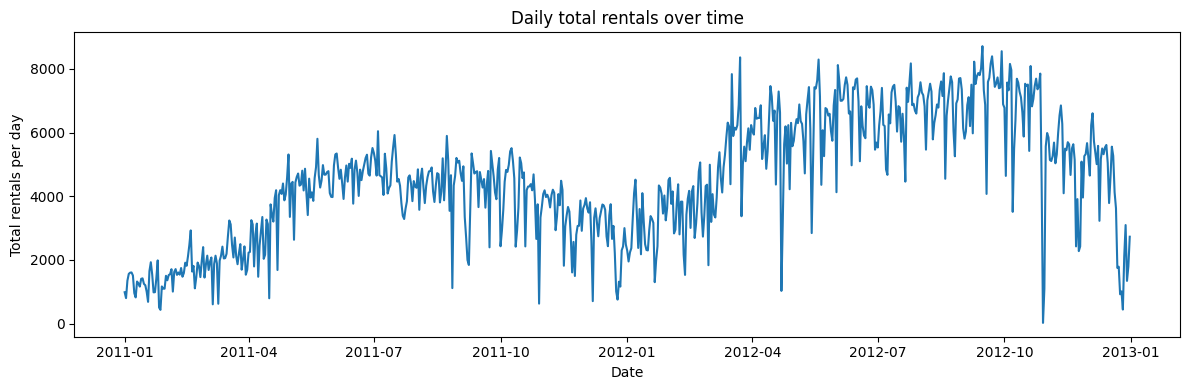

In [5]:
import matplotlib.pyplot as plt

df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year

ndays = df['dteday'].nunique()
print('Date range:', df['dteday'].min(), 'to', df['dteday'].max())
print('Unique days (records):', ndays)


plt.figure(figsize=(12,4))
plt.plot(df.sort_values('dteday').groupby('dteday')['cnt'].sum())
plt.title('Daily total rentals over time')
plt.ylabel('Total rentals per day')
plt.xlabel('Date')
plt.tight_layout()

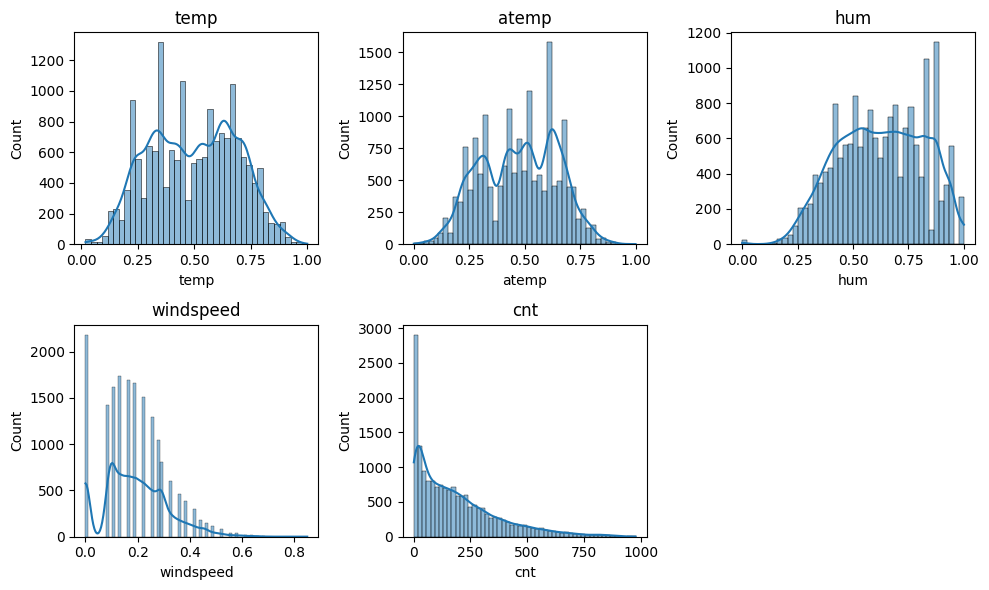

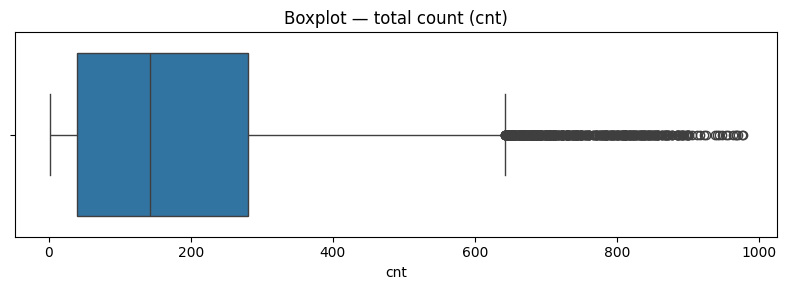

In [6]:
import seaborn as sns

plt.figure(figsize=(10,6))
for i,col in enumerate(['temp','atemp','hum','windspeed','cnt']):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()

plt.figure(figsize=(8,3))
sns.boxplot(x=df['cnt'])
plt.title('Boxplot — total count (cnt)')
plt.tight_layout()

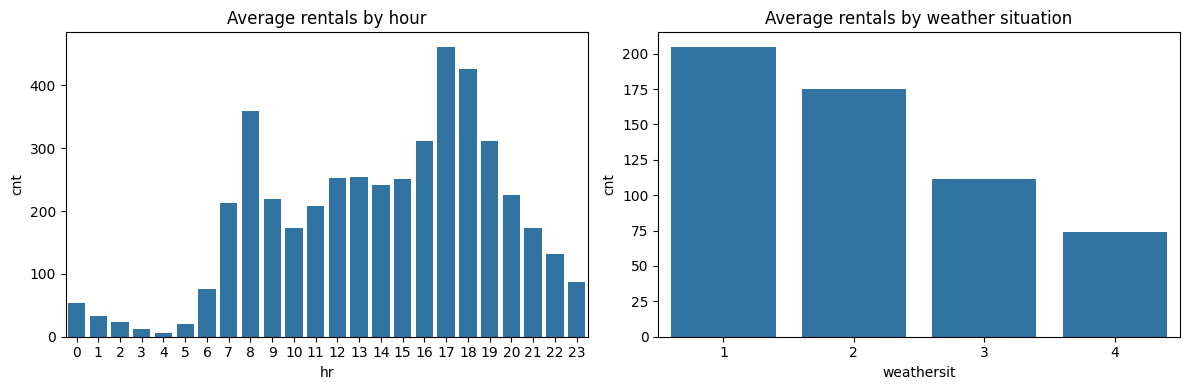

In [7]:
cat_cols = ['season','mnth','hr','weekday','weathersit','holiday','workingday']
df.melt(value_vars=cat_cols).groupby(['variable', 'value']).size()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='hr', y='cnt', data=df.groupby('hr')['cnt'].mean().reset_index())
plt.title('Average rentals by hour')
plt.subplot(1,2,2)
sns.barplot(x='weathersit', y='cnt', data=df.groupby('weathersit')['cnt'].mean().reset_index())
plt.title('Average rentals by weather situation')
plt.tight_layout()

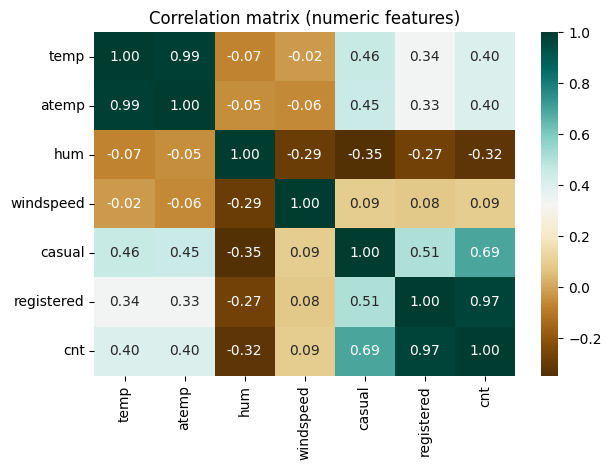

In [8]:
corr = df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BrBG')
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()

Data Preparation

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("Missing values per column:")
print(df.isnull().sum())

dup_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", dup_count)

# Load dataset (adjust path!)
df = pd.read_csv("data/hour.csv")

# Convert date column & extract year
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year

# Drop atemp due to multicollinearity
df = df.drop(columns=['atemp'])

# One-hot encode categorical variables
cat_cols = ['season','mnth','hr','weekday','weathersit','holiday','workingday']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numerical features
num_cols = ['temp','hum','windspeed']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Define input (X) and target (y)
X = df.drop(columns=['cnt', 'casual', 'registered', 'dteday'])  # cnt is the prediction target
y = df['cnt']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data preparation completed successfully.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
dtype: int64

Number of duplicate rows: 0
Data preparation completed successfully.
Training set shape: (13903, 54)
Test set shape: (3476, 54)


Models Training and Evalution 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from catboost import CatBoostRegressor

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# 4. Cat Boost
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    random_state=42,
    verbose=False
)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MAE:  {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²:   {r2:.3f}\n")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

evaluate_model("Gradient Boosting", y_test, gbr_pred)
evaluate_model("CatBoost", y_test, cat_pred)

Linear Regression Performance:
  MAE:  74.085
  RMSE: 100.494
  R²:   0.681

Random Forest Performance:
  MAE:  31.069
  RMSE: 49.734
  R²:   0.922

Gradient Boosting Performance:
  MAE:  49.919
  RMSE: 69.254
  R²:   0.849

CatBoost Performance:
  MAE:  30.695
  RMSE: 46.449
  R²:   0.932



In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, lr_pred)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Linear Regression: Real vs Predicted")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Random Forest: Real vs Predicted")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, gbr_pred)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Gradient Boosting: Real vs Predicted")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, cat_pred)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("CatBoost: Real vs Predicted")
plt.show()